# 1. Introduction
Harmful use of alcohol causes more than 5% of the global disease burden. The death of more than [3 million people](https://www.who.int/news-room/detail/21-09-2018-harmful-use-of-alcohol-kills-more-than-3-million-people-each-year--most-of-them-men) a year is caused by the substance. Simultaneously it is source of a [1344 billion dollar industry](https://www.statista.com/statistics/696641/market-value-alcoholic-beverages-worldwide/), and an important cultural factor. This makes it a highly important, and highly complex, matter for regulators which have to take into account many aspects when creating policies.

The goal of this notebook is to aggregate different alcohol control policies to understand which are the most common and test the correlation between alcohol consumption and different alcohol control policies


## 1.1 Libraries importation

In [67]:
# import libraries
from preprocess_data import *
import os
import pandas as pd
import numpy as np
import csv
import folium
import geopandas
import warnings
from folium import plugins
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

# import geoplot
pylab.rcParams['figure.figsize'] = 20, 20

## 1.2 Define file paths

In [2]:
#original_file_PATH_definitions
projectdata_PATH = "../data/projectdata/"
dataprocessed_PATH = "../data/dataprocessed/"

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## 1.3 Defines functions used to preprocess the project data

In order to keep this notebook as clean as possible, the functions where written in the python package `preprocess_data`

1. We have divided all the countries in the database into eight parts according to the United Nations geographical division criteria.
2. This is because we take into account that countries in the same region have similar political conditions, living habits and cultural background, such as countries in the EU, while countries in different regions are quite different in these aspects.
3. Therefore, our subsequent analysis will be based on the results of the following country segmentation.

## 1.4 DataSets Overview

**DataSet 1. Pure alcohol consumption, litres per capita, age 15+**


* Data type: Numerical

* Unit: Litres per capita

* Rationale: This is the indicator we want to analyze

* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.

* Year of measurement: 2016 and 2010


Short name: Alcohol consumption


Total countries:194

In [4]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.gisah.A1029\'></iframe><br>'))

**DataSet 2. Alcohol control policies: Global information system on alcohol and health**
* Short name: Policies

* Data type: Categorical

* Rationale: Legislators create alcohol control policies with the goal of affecting several behaviours related to alcohol consumption and generally to decrease the consumption

* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.

* Year of measure: 2016



In [5]:

display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.gisah.A1119\'></iframe><br>'))

**DataSet 3. Human Development Reports: GDP, Education Index, Unemployment, Median age, Human Development Index**

* Short name: HDR factors

* Data type: Numerical

* Rationale: Several socio-economical factors can influence the alcohol consumption of a population. For this reason we have chosen several indicators used by the UN development agency, to see what influence they have and how their influence compares to alcohol control policies.

* Method of estimation: Answer from statistical department of the respective governments.

* Year of measure: Yearly from 2000, every five years before

In [6]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://hdr.undp.org/en/data\'></iframe><br>'))

**DataSet 4. United Nations Regional Groups**

* Short name: Regions

* Data type: Categorical

* Rationale: Alcohol consumption of a country is probably highly dependent from which region of the world the country is situated

In [7]:

display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'https://en.wikipedia.org/wiki/United_Nations_Regional_Groups\'></iframe><br>'))



**DataSet 5. Major Religions in Countries**

* Short name: Religions

* Data type: Categorical

* Rationale: Religion and its approach is a major factor to take into account when comparing countries as many religions dictate a certain approach to consumption

In [8]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'https://www.nationmaster.com/country-info/stats/Religion/Religions/All\'></iframe><br>'))

# 2. Preprocessing
## 2.1 Alcohol consumption



In [9]:
process_country_name(projectdata_PATH + "Consumption.csv", projectdata_PATH + "Consumption_namecleaned.csv", 0)

### Split consumption value and 95%CI 

In [10]:
# Preprocess consumption file's
df_consumption = pd.read_csv(projectdata_PATH + "Consumption_namecleaned.csv", header=0, sep=',', names=['Country', '2015-2017', '2009-2011'])
df_consumption.head()
df_consumption['Alcohol_per_capita_2015-2017'], df_consumption['Alcohol_per_capita_2015-2017_95%CI'] = df_consumption['2015-2017'].str.split('[', 1).str
df_consumption['Alcohol_per_capita_2009-2011'], df_consumption['Alcohol_per_capita_2009-2011_95%CI'] = df_consumption['2009-2011'].str.split('[', 1).str

for row in df_consumption.iterrows():
    if isinstance(row[1][2], str):
        row[1][2] = row[1][2].replace("]", "")
    if isinstance(row[1][4], str):
        row[1][4] = row[1][4].replace("]", "")
df_consumption= df_consumption[['Country', 
                                 'Alcohol_per_capita_2015-2017', 
                                 'Alcohol_per_capita_2015-2017_95%CI']]
# 'Alcohol_per_capita_2009-2011', 'Alcohol_per_capita_2009-2011_95%CI'

df_consumption.to_csv(projectdata_PATH + "Consumption_final.csv", index=False, sep=',')

## 2.2 Policies

### 2.2.1 Clean the 4 simplest datasets: Tax, Liscence, Community_action, Health_warning 

1. Data transformation: from categorical to numerial : Turning Yes/No to 1/0
Type of transformations:
- set banned to 0
- 
/n Which function and what does it do?
2. Missing data handling policy: dropped XXX rows / imputation by (mean, median)

In [91]:
preprocess_data_file(Tax_CSV_FILE_PATH, "../data/dataprocessed/Tax_processed.csv")
preprocess_data_file(Liscence_production_CSV_FILE_PATH, "../data/dataprocessed/Liscence_production_processed.csv")
preprocess_data_file(Liscence_retail_CSV_FILE_PATH, "../data/dataprocessed/Liscence_retail_processed.csv")
preprocess_data_file(Community_actions_CSV_FILE_PATH, "../data/dataprocessed/Community_actions_processed.csv")
preprocess_data_file_one(Health_warning_CSV_FILE_PATH, "../data/dataprocessed/Health_warning_processed.csv")

In [92]:
b = pd.read_csv(Public_use_CSV_FILE_PATH, header=None, sep=',')
b = pd.DataFrame(b)
for i in range(2, 4):
    print("Value_counts for column", i, "\n")
    print(b[i].value_counts())

Value_counts for column 2 

ban                               108
voluntary/self-restricted          28
No data                            27
partial restriction                19
no restrictions                    12
 Educational buildings              1
Restrictions on alcohol use in      1
Name: 2, dtype: int64
Value_counts for column 3 

ban                               91
voluntary/self-restricted         30
No data                           27
no restrictions                   24
partial restriction               22
 Government offices                1
Restrictions on alcohol use in     1
Name: 3, dtype: int64


In [123]:
# print every file after cleaning
df_tax = pd.read_csv(dataprocessed_PATH + "Tax.csv", sep=',')
df_tax.head(10)

,Country,Year,Tax on beer,Tax on wine,Tax on spirits
0,Albania,2016,1,1,1
1,Algeria,2016,1,1,1
2,Andorra,2016,1,1,1
3,Angola,2016,1,1,1
4,Antigua and Barbuda,2016,0,0,0
5,Argentina,2016,1,0,1
6,Armenia,2016,1,1,1
7,Australia,2016,1,1,1
8,Austria,2016,1,0,1
9,Azerbaijan,2016,1,1,1


In [13]:
df_liscence_production = pd.read_csv(dataprocessed_PATH + "Licence_production.csv", sep=',')
df_liscence_production.head(10)

,Country,Year,Licence for beer production,Licence for wine production,Licence for spirits production
0,Albania,2016,1.0,1.0,1.0
1,Algeria,2016,0.0,0.0,0.0
2,Andorra,2016,1.0,1.0,1.0
3,Angola,2016,1.0,1.0,1.0
4,Antigua and Barbuda,2016,0.0,1.0,1.0
5,Argentina,2016,0.0,0.0,0.0
6,Armenia,2016,1.0,1.0,1.0
7,Austria,2016,0.0,0.0,0.0
8,Azerbaijan,2016,1.0,1.0,1.0
9,Bahamas,2016,1.0,0.0,1.0


In [14]:
df_liscence_retail = pd.read_csv(dataprocessed_PATH + "Licence_retail.csv", sep=',')
df_liscence_retail.head(10)

,Country,Year,Licence for beer retail sales,Licence for wine retail sales,Licence for spirits retail sales
0,Albania,2016,1,1,1
1,Algeria,2016,1,1,1
2,Andorra,2016,1,1,1
3,Angola,2016,1,1,1
4,Antigua and Barbuda,2016,1,1,1
5,Argentina,2016,0,0,0
6,Armenia,2016,0,0,0
7,Austria,2016,0,0,0
8,Azerbaijan,2016,1,1,1
9,Bahamas,2016,1,1,1


In [15]:
df_community_actions = pd.read_csv(dataprocessed_PATH + "Community_actions.csv", sep=',')
df_community_actions.head(10)

,Country,Year,Government support for earmarked funds,Government support for technical tools,Government support for training programmes,Government support for at-risk groups targeted,Government support for community programmes,Government support for provision of information,Government support for data dissemination,Government support for research studies
0,Afghanistan,2016,0,0,0,0,0,0,0,0
1,Albania,2016,0,0,0,0,0,1,1,0
2,Algeria,2016,0,0,0,0,0,0,0,0
3,Andorra,2016,0,0,0,0,0,0,0,0
4,Angola,2016,0,0,1,0,1,0,1,0
5,Antigua and Barbuda,2016,0,0,1,0,0,1,0,0
6,Argentina,2016,1,0,1,1,0,1,1,0
7,Armenia,2016,0,0,0,0,0,0,0,0
8,Australia,2016,1,0,0,1,0,0,0,0
9,Austria,2016,0,0,0,0,0,0,0,0


In [16]:
df_health_warning = pd.read_csv(dataprocessed_PATH + "Heatlh_warning.csv", sep=',')
df_health_warning.head(10)

,Country,Year,Health warning labels on alcohol containers
0,Albania,2016,1
1,Algeria,2016,0
2,Andorra,2016,0
3,Angola,2016,0
4,Antigua and Barbuda,2016,0
5,Argentina,2016,1
6,Armenia,2016,0
7,Australia,2016,0
8,Austria,2016,0
9,Azerbaijan,2016,0


### 2.2.2 Clean public_use dataset, change text to valuse

Replacing text value according to below:

ban                                               1

partial restriction                             0.5

voluntary/self-restricted                       0.3 (this parameter can be changed)

no restrictions                                  0

leave out nodata rows:

No data        

In [122]:
preprocess_public_use_data(projectdata_PATH + "Public_use.csv", dataprocessed_PATH + "Public_use.csv")
df_public_use = pd.read_csv(dataprocessed_PATH + "Public_use.csv", sep=',')
df_public_use.head(10)

,Country,Year,Restrictions on alcohol use in educational buildings,Restrictions on alcohol use in government offices,Restrictions on alcohol use in healthcare establishments,Restrictions on alcohol use in leisure events,Restrictions on alcohol use in parks and streets,Restrictions on alcohol use in public transport,Restrictions on alcohol use in places of worship,Restrictions on alcohol use in sporting events,Restrictions on alcohol use in workplaces
0,Afghanistan,2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Albania,2016,1.0,0.5,1.0,0.3,0.0,0.3,1.0,1.0,1.0
2,Algeria,2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Andorra,2016,0.5,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5
4,Angola,2016,0.5,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5
5,Antigua and Barbuda,2016,0.3,0.3,0.3,0.0,0.0,0.0,0.3,0.0,0.3
6,Argentina,2016,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
7,Armenia,2016,1.0,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,Australia,2016,0.3,0.3,0.3,0.5,0.5,0.5,0.3,0.5,0.3
9,Austria,2016,0.3,0.3,0.3,0.5,0.5,0.5,0.3,0.5,0.3


### 2.2.3 Clean age_limit data set,  change text to value

Using max min scale, (0, age value, Total ban=50) ~ (0,1)

None              0

15  16  17  18  19  20  21  25

Total ban          50

Subnational 2      drop

No data  21       drop


In [18]:
#preprocess_age_limits(projectdata_PATH + "Age_limits.csv", dataprocessed_PATH + 'Age_limits.csv')
df_age_limits = pd.read_csv(dataprocessed_PATH + 'Age_limits.csv', sep=',')
df_age_limits.head()

,Country,Year,Age limits off-premise sales for beer,Age limits off-premise sales for wine,Age limits off-premise sales for spirits,Age limits on-premise service for beer,Age limits on-premise service for wine,Age limits on-premise service for spirits
0,Afghanistan,2016,1.00,1.00,1.00,1.00,1.00,1.00
1,Albania,2016,0.36,0.36,0.36,0.36,0.36,0.36
2,Algeria,2016,0.36,0.36,0.36,0.36,0.36,0.36
3,Andorra,2016,0.36,0.36,0.36,0.36,0.36,0.36
4,Angola,2016,0.36,0.36,0.36,0.36,0.36,0.36


In [95]:
add_code_region_religion(Age_limits_CSV_FILE_PATH, "../data/dataprocessed/Age_limits_processed.csv")

Successfully Converted: 162


## 2.4 Process countries Region and Religion and agglomerate to consumption

### 2.4.1 Divide Region

In [124]:
#file_path_definitions_for_consumptions
Age_limits_CSV_FILE_PATH = '../data/projectdata/Age_limits.csv'
Public_use_CSV_FILE_PATH = '../data/projectdata/Public_use.csv'
Liscence_retail_CSV_FILE_PATH = '../data/projectdata/Licence_retail.csv'  # bool influence the retail sales first
Liscence_production_CSV_FILE_PATH = '../data/projectdata/Licence_production.csv'
Tax_CSV_FILE_PATH = '../data/projectdata/Tax.csv'   # bool
Community_actions_CSV_FILE_PATH = '../data/projectdata/Community_actions.csv'  #  bool
Health_warning_CSV_FILE_PATH = '../data/projectdata/Health_warning.csv'
Consumption_CSV_FILE_PATH = '../data/projectdata/Consumption.csv'
Countries_list_PATH = '../data/dataprocessed/Country_list_final_2.csv'
Countries_location_PATH = '../data/dataprocessed/Country_location.csv'
Countries_code_PATH = '../data/projectdata/iso_countries_list.csv'

1. We have divided all the countries in the database into eight parts according to the United Nations geographical division criteria.
2. This is because we take into account that countries in the same region have similar political conditions, living habits and cultural background, such as countries in the EU, while countries in different regions are quite different in these aspects.
3. Therefore, our subsequent analysis will be based on the results of the following country segmentation.

In [19]:
# Add latitude and longitude into country list
process_countries(projectdata_PATH + "Country_list.csv", dataprocessed_PATH + "Country_list_lat_long_final.csv")
df_country_location = pd.read_csv(dataprocessed_PATH + 'Country_list_lat_long_final.csv', sep=',')
df_country_location.head()

Successfully Converted: 173


,Number,Country,iso2,iso3,latitude,longitude,Region,Religion
0,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam
1,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs
2,2,Benin,BJ,BEN,9.30769,2.315834,African Group,indigenous beliefs
3,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian
4,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam


### 2.4.2 Create final country list data with location, consumption and region

In [127]:
cdata = pd.merge(df_country_location, df_consumption, on='Country')
cdata.to_csv(projectdata_PATH + "Countries_finaldf.csv", index=False, sep=',')
cdata.head()

,Number,Country,iso2,iso3,latitude,longitude,Region,Religion,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI,Alcohol_per_capita_2009-2011,Alcohol_per_capita_2009-2011_95%CI
0,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam,0.6,0.6-0.6,0.4,0.4-0.4
1,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs,5,4.9-5.1,7.5,7.3-7.6
2,2,Benin,BJ,BEN,9.30769,2.315834,African Group,indigenous beliefs,1.6,1.5-1.6,1.3,1.3-1.4
3,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian,6.2,6.1-6.3,5.6,5.5-5.8
4,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam,4.9,4.8-5,4.6,4.5-4.7


In [128]:
# Split consumption value and 95%CI 
# Preprocess consumption file's
df_consumption = pd.read_csv("../data/projectdata/Consumption_namecleaned.csv", header=0, sep=',', names=['Country', '2015-2017', '2009-2011'])
df_consumption.head()
df_consumption['Alcohol_per_capita_2015-2017'], df_consumption['Alcohol_per_capita_2015-2017_95%CI'] = df_consumption['2015-2017'].str.split('[', 1).str
df_consumption['Alcohol_per_capita_2009-2011'], df_consumption['Alcohol_per_capita_2009-2011_95%CI'] = df_consumption['2009-2011'].str.split('[', 1).str
df_consumption = df_consumption[['Country', 'Alcohol_per_capita_2015-2017', 'Alcohol_per_capita_2015-2017_95%CI', 'Alcohol_per_capita_2009-2011', 'Alcohol_per_capita_2009-2011_95%CI']]
for row in df_consumption.iterrows():
    if isinstance(row[1][2], str):
        row[1][2] = row[1][2].replace("]", "")
    if isinstance(row[1][4], str):
        row[1][4] = row[1][4].replace("]", "")
df_consumption = df_consumption[1:]
df_consumption.to_csv("../data/projectdata/Consumption_final.csv", index=False, header=None, sep=',')
df_consumption.head(10)

,Country,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI,Alcohol_per_capita_2009-2011,Alcohol_per_capita_2009-2011_95%CI
1,Afghanistan,0,0-0,0,0-0
2,Albania,5,4.9-5.1,5.7,5.6-5.9
3,Algeria,0.6,0.6-0.6,0.4,0.4-0.4
4,Andorra,10.1,9.9-10.3,11,10.8-11.2
5,Angola,5,4.9-5.1,7.5,7.3-7.6
6,Antiguaandbarbuda,8.5,8.3-8.6,7.9,7.7-8
7,Argentina,8.4,8.3-8.6,8.2,8-8.4
8,Armenia,3.8,3.7-3.9,4.1,4-4.2
9,Australia,9.7,9.5-9.8,10.5,10.3-10.7
10,Austria,11.4,11.2-11.6,11.8,11.5-12


In [129]:
# Merge country location adn consumption dataframes
finaldf = pd.merge(df_country_location, df_consumption, on='Country')
finaldf.to_csv("../data/projectdata/Countries_finaldf.csv", index=False, sep=',', header=['Number', 'Country', 'iso2', 'iso_a3', 'latitude', 'longitude', 'Region', 'Religion', 'Alcohol_per_capita_2015-2017', 'Alcohol_per_capita_2015-2017_95%CI', 'Alcohol_per_capita_2009-2011', 'Alcohol_per_capita_2009-2011_95%CI'])
finaldf.head(10)

,Number,Country,iso2,iso3,latitude,longitude,Region,Religion,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI,Alcohol_per_capita_2009-2011,Alcohol_per_capita_2009-2011_95%CI
0,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam,0.6,0.6-0.6,0.4,0.4-0.4
1,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs,5,4.9-5.1,7.5,7.3-7.6
2,2,Benin,BJ,BEN,9.30769,2.315834,African Group,indigenous beliefs,1.6,1.5-1.6,1.3,1.3-1.4
3,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian,6.2,6.1-6.3,5.6,5.5-5.8
4,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam,4.9,4.8-5,4.6,4.5-4.7
5,5,Burundi,BI,BDI,-3.373056,29.918886,African Group,Roman Catholic,4.1,4-4.2,4.1,4-4.2
6,6,Cameroon,CM,CMR,7.369722,12.354722,African Group,indigenous beliefs,6.5,6.4-6.6,6.1,6-6.2
7,7,Centralafricanrepublic,CF,CAF,6.611111,20.939444,African Group,indigenous beliefs,1.7,1.6-1.7,1.7,1.7-1.8
8,8,Chad,TD,TCD,15.454166,18.732207,African Group,Islam,0.7,0.7-0.7,0.6,0.5-0.6
9,9,Comoros,KM,COM,-11.875001,43.872219,African Group,Islam,0.1,0.1-0.2,0.1,0.1-0.2


In [130]:
# Merge dataset with Regions, Religions and Locations(Latitude, Longitude)
df_country = pd.read_csv("../data/dataprocessed/Country_list_final.csv", header=None, sep=',')
df_country.head(10)

,0,1,2,3,4
0,Number,iso3,Country,Region,Religion
1,0,DZA,Algeria,African Group,Islam
2,1,AGO,Angola,African Group,indigenous beliefs
3,2,BEN,Benin,African Group,indigenous beliefs
4,3,BWA,Botswana,African Group,Christian
5,4,BFA,Burkinafaso,African Group,Islam
6,5,BDI,Burundi,African Group,Roman Catholic
7,6,CMR,Cameroon,African Group,indigenous beliefs
8,7,CAF,Centralafricanrepublic,African Group,indigenous beliefs
9,8,TCD,Chad,African Group,Islam


In [131]:
# Read latitude value in location file
df_latitude = pd.read_csv("../data/dataprocessed/Country_location.csv", header=None, sep=',')
df_latitude.head(10)

,0,1,2,3
0,iso2,latitude,longitude,Country
1,AD,42.546245,1.601554,Andorra
2,AE,23.424076,53.847818,United Arab Emirates
3,AF,33.93911,67.709953,Afghanistan
4,AG,17.060816,-61.796428,Antigua and Barbuda
5,AI,18.220554,-63.068615,Anguilla
6,AL,41.153332,20.168331,Albania
7,AM,40.069099,45.038189,Armenia
8,AN,12.226079,-69.060087,Netherlands Antilles
9,AO,-11.202692,17.873887,Angola


In [132]:
# Read country_code value in iso file
df_country_code = pd.read_csv("../data/projectdata/iso_countries_list.csv", header=None, sep=',')
df_country_code.head(10)

,0,1,2,3,4
0,name,iso_name,iso2,iso3,numcode
1,Antigua and Barbuda,ANTIGUA AND BARBUDA,AG,ATG,28
2,Bosnia and Herzegovina,BOSNIA AND HERZEGOVINA,BA,BIH,70
3,Cocos (Keeling) Islands,COCOS (KEELING) ISLANDS,CC,\N,\N
4,"Congo, the Democratic Republic of the","CONGO, THE DEMOCRATIC REPUBLIC OF THE",CD,COD,180
5,Cote D'Ivoire,COTE D'IVOIRE,CI,CIV,384
6,Fiji,FIJI,FJ,FJI,242
7,French Southern Territories,FRENCH SOUTHERN TERRITORIES,TF,\N,\N
8,Heard Island and Mcdonald Islands,HEARD ISLAND AND MCDONALD ISLANDS,HM,\N,\N
9,Holy See (Vatican City State),HOLY SEE (VATICAN CITY STATE),VA,VAT,336


In [133]:
# Add latitude and longitude into country list
process_countries(Countries_list_PATH, '../data/dataprocessed/countries_location_final.csv')
df_country_location = pd.read_csv('../data/dataprocessed/countries_location_final.csv', header=None, sep=',', names=['Number', 'Country', 'iso2', 'iso3', 'latitude', 'longitude', 'Region', 'Religion'])
df_country_location.head(10)

Successfully Converted: 173


,Number,Country,iso2,iso3,latitude,longitude,Region,Religion
0,Number,Country,iso2,iso3,latitude,longitude,Region,Religion
1,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam
2,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs
3,2,Benin,BJ,BEN,9.30769,2.315834,African Group,indigenous beliefs
4,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian
5,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam
6,5,Burundi,BI,BDI,-3.373056,29.918886,African Group,Roman Catholic
7,6,Cameroon,CM,CMR,7.369722,12.354722,African Group,indigenous beliefs
8,7,Centralafricanrepublic,CF,CAF,6.611111,20.939444,African Group,indigenous beliefs
9,8,Chad,TD,TCD,15.454166,18.732207,African Group,Islam


## 2.5 Processing and data agglomeration of HDR factors

In [22]:
#create dataframes for each factor
df_hdi = pd.read_csv(projectdata_PATH + "Human_Development_Index.csv")
df_unempl = pd.read_csv(projectdata_PATH + "Unemployment.csv")
df_median = pd.read_csv(projectdata_PATH + "Median_age.csv")
df_gdp = pd.read_csv(projectdata_PATH + "GDP.csv")
df_edu = pd.read_csv(projectdata_PATH + "Education_Index.csv")

In [23]:
# creates one DataFrame with all policies
co = pd.read_csv(projectdata_PATH + "Country_list.csv").drop(labels='Number', axis=1)
df_hdr = df_hdi.set_index(['Country','Year']).join([df_unempl.set_index(['Country','Year']), 
                                                  df_median.set_index(['Country','Year']),
                                                  df_gdp.set_index(['Country','Year']),
                                                  df_edu.set_index(['Country','Year'])],
                                                  how='outer')
df_hdr = df_hdr.reset_index('Year')
df_hdr = df_hdr.join(co.set_index(['Country']))
df_hdr = df_hdr.drop(labels='Year', axis='columns')
df_hdr = df_hdr.rename({'iso3':'Code'}, axis=1)
df_hdr = df_hdr[:-1]
df_hdr.head(10)

,HDI_2016,"Unemployment, total (% of labour force)",Median age (years),Gross domestic product (GDP) per capita (2011 PPP $),Education Index,Code,Region,Religion
Country,,,,,,,,
Afghanistan,0.494,8.8,17.3,1803,0.41,AFG,Asia-Pacific Group,Islam
Albania,0.782,15.2,36.2,11356,0.742,ALB,Eastern European Group,Islam
Algeria,0.753,10.2,27.5,13921,0.663,DZA,African Group,Islam
Andorra,0.856,..,..,..,0.714,AND,Western European and Others Group,Roman Catholic
Angola,0.577,7.7,16.4,5972,0.487,AGO,African Group,indigenous beliefs
Antigua and Barbuda,0.778,..,30.7,21013,0.676,NaN,NaN,NaN
Argentina,0.822,8.4,30.8,18585,0.814,ARG,Latin American and Caribbean Group,Roman Catholic
Armenia,0.749,18,33.9,8190,0.749,ARM,Eastern European Group,Armenian Apostolic
Australia,0.938,5.7,37.4,44493,0.929,AUS,Western European and Others Group,Roman Catholic


In [24]:
#standardizing names as used for policies
as_list = df_hdr.index.tolist()
idx = as_list.index('Korea (Democratic People\'s Rep. of)')
as_list[idx] = 'Democratic People\'s Republic of Korea'
idx = as_list.index('Korea (Republic of)')
as_list[idx] = 'Republic of Korea'
idx = as_list.index('Moldova (Republic of)')
as_list[idx] = 'Republic of Moldova'
idx = as_list.index('The former Yugoslav Republic of Macedonia')
as_list[idx] = 'Republic of North Macedonia'
idx = as_list.index('United Kingdom')
as_list[idx] = 'United Kingdom of Great Britain and Northern Ireland'
idx = as_list.index('United States')
as_list[idx] = 'United States of America'
idx = as_list.index('Congo (Democratic Republic of the)')
as_list[idx] = 'Democratic Republic of the Congo'
idx = as_list.index('Eswatini (Kingdom of)')
as_list[idx] = 'Eswatini'
df_hdr.index = as_list

## 2.6 Data agglomeration for the policies

In [25]:
# creates one DataFrame with all policies
df_policy_rough = df_age_limits.set_index(['Country','Year']).join([df_community_actions.set_index(['Country','Year']), 
                                                  df_health_warning.set_index(['Country','Year']),
                                                  df_liscence_production.set_index(['Country','Year']),
                                                  df_liscence_retail.set_index(['Country','Year']),
                                                  df_tax.set_index(['Country','Year']),
                                                  df_public_use.set_index(['Country','Year'])],
                                                  how='outer')
df_policy_rough = df_policy_rough.reset_index('Year')
df_policy_rough = df_policy_rough.drop(labels='Year', axis='columns')
#df_policy_rough = df_policy_rough.rename({'iso3':'Code'}, axis=1)
df_policy_rough.head(10)

,Age limits off-premise sales for beer,Age limits off-premise sales for wine,Age limits off-premise sales for spirits,Age limits on-premise service for beer,Age limits on-premise service for wine,Age limits on-premise service for spirits,Government support for earmarked funds,Government support for technical tools,Government support for training programmes,Government support for at-risk groups targeted,...,Tax on spirits,Restrictions on alcohol use in educational buildings,Restrictions on alcohol use in government offices,Restrictions on alcohol use in healthcare establishments,Restrictions on alcohol use in leisure events,Restrictions on alcohol use in parks and streets,Restrictions on alcohol use in public transport,Restrictions on alcohol use in places of worship,Restrictions on alcohol use in sporting events,Restrictions on alcohol use in workplaces
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Albania,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,1.0,0.5,1.0,0.3,0.0,0.3,1.0,1.0,1.0
Algeria,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Andorra,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,0.5,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5
Angola,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,1.0,0.0,...,1.0,0.5,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5
Antigua and Barbuda,0.00,0.00,0.00,0.32,0.32,0.32,0.0,0.0,1.0,0.0,...,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,0.0,0.3
Argentina,0.36,0.36,0.36,0.36,0.36,0.36,1.0,0.0,1.0,1.0,...,1.0,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
Armenia,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Australia,0.36,0.36,0.36,0.36,0.36,0.36,1.0,0.0,0.0,1.0,...,1.0,0.3,0.3,0.3,0.5,0.5,0.5,0.3,0.5,0.3


### 2.6.1 Handling missing values

In [26]:
# drops countries where there is no data
df_policy=df_policy_rough.dropna(axis='rows', how='all')
print('Number of countries with data about policies :', df_policy.shape[0]-3)
#check the types
df_policy.dtypes

Number of countries with data about policies : 173


Age limits off-premise sales for beer                       float64
Age limits off-premise sales for wine                       float64
Age limits off-premise sales for spirits                    float64
Age limits on-premise service for beer                      float64
Age limits on-premise service for wine                      float64
Age limits on-premise service for spirits                   float64
Government support for earmarked funds                      float64
Government support for technical tools                      float64
Government support for training programmes                  float64
Government support for at-risk groups targeted              float64
Government support for community programmes                 float64
Government support for provision of information             float64
Government support for data dissemination                   float64
Government support for research studies                     float64
Health warning labels on alcohol containers     

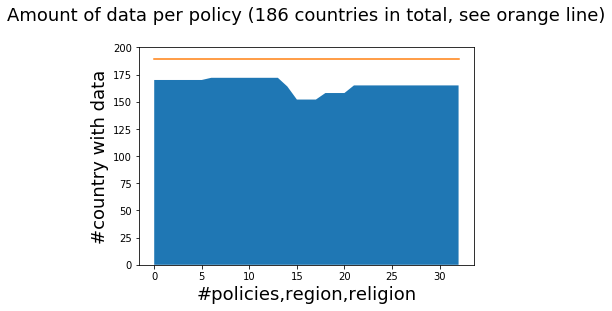

In [27]:
# maybe plot this so that we can visualize it
plt.stackplot(range(len(df_policy.columns)),df_policy.count())
plt.plot(np.linspace(189,189,len(df_policy.columns)), )
plt.xlabel("#policies,region,religion", fontsize=18)
plt.ylabel("#country with data", fontsize=18)
plt.ylim(0, 200)
plt.title('Amount of data per policy (186 countries in total, see orange line)\n', fontsize=18)
plt.show()

We have some countries that are not in our region and religion dataset. This is probbly due to the fact that the regoinal division is from a UN dataset and some smaller countries are not part of the UN

## 2.6.2 Imputation
As there is a low number of missing data, we choose to impute the missing values with mean so as to keep as much meaningful data as possible

In [28]:
df_policy.fillna(df_policy.mean(), inplace=True)

/home/tomas/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## 2.7 Agglomerate policies, HDR factors, Region and Religion in one dataframe

In [29]:
df_all = df_policy.join(df_hdr, how= 'left')
df_all = df_all.dropna(axis=0, subset=['HDI_2016'])
pd.set_option('display.max_rows', df_all.shape[0]+1)
df_all.head(10)

,Age limits off-premise sales for beer,Age limits off-premise sales for wine,Age limits off-premise sales for spirits,Age limits on-premise service for beer,Age limits on-premise service for wine,Age limits on-premise service for spirits,Government support for earmarked funds,Government support for technical tools,Government support for training programmes,Government support for at-risk groups targeted,...,Restrictions on alcohol use in sporting events,Restrictions on alcohol use in workplaces,HDI_2016,"Unemployment, total (% of labour force)",Median age (years),Gross domestic product (GDP) per capita (2011 PPP $),Education Index,Code,Region,Religion
Afghanistan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.494,8.8,17.3,1803,0.41,AFG,Asia-Pacific Group,Islam
Albania,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.782,15.2,36.2,11356,0.742,ALB,Eastern European Group,Islam
Algeria,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.753,10.2,27.5,13921,0.663,DZA,African Group,Islam
Andorra,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,0.0,0.5,0.856,..,..,..,0.714,AND,Western European and Others Group,Roman Catholic
Angola,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,1.0,0.0,...,0.0,0.5,0.577,7.7,16.4,5972,0.487,AGO,African Group,indigenous beliefs
Antigua and Barbuda,0.000000,0.000000,0.000000,0.320000,0.320000,0.320000,0.0,0.0,1.0,0.0,...,0.0,0.3,0.778,..,30.7,21013,0.676,NaN,NaN,NaN
Argentina,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,1.0,0.0,1.0,1.0,...,0.3,0.3,0.822,8.4,30.8,18585,0.814,ARG,Latin American and Caribbean Group,Roman Catholic
Armenia,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.749,18,33.9,8190,0.749,ARM,Eastern European Group,Armenian Apostolic
Australia,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,1.0,0.0,0.0,1.0,...,0.5,0.3,0.938,5.7,37.4,44493,0.929,AUS,Western European and Others Group,Roman Catholic
Austria,0.363294,0.365647,0.365059,0.376235,0.376235,0.375647,0.0,0.0,0.0,0.0,...,0.5,0.3,0.906,6,43.2,44464,0.852,AUT,Western European and Others Group,Roman Catholic


# 3 Policy analysis

In this section we want to analyse what kind of policies are present in different parts of the world and understand why

## 3.1 Visualization of Alcohol consumption Region and Religion

### 3.1.1 Initialization of using geopandas

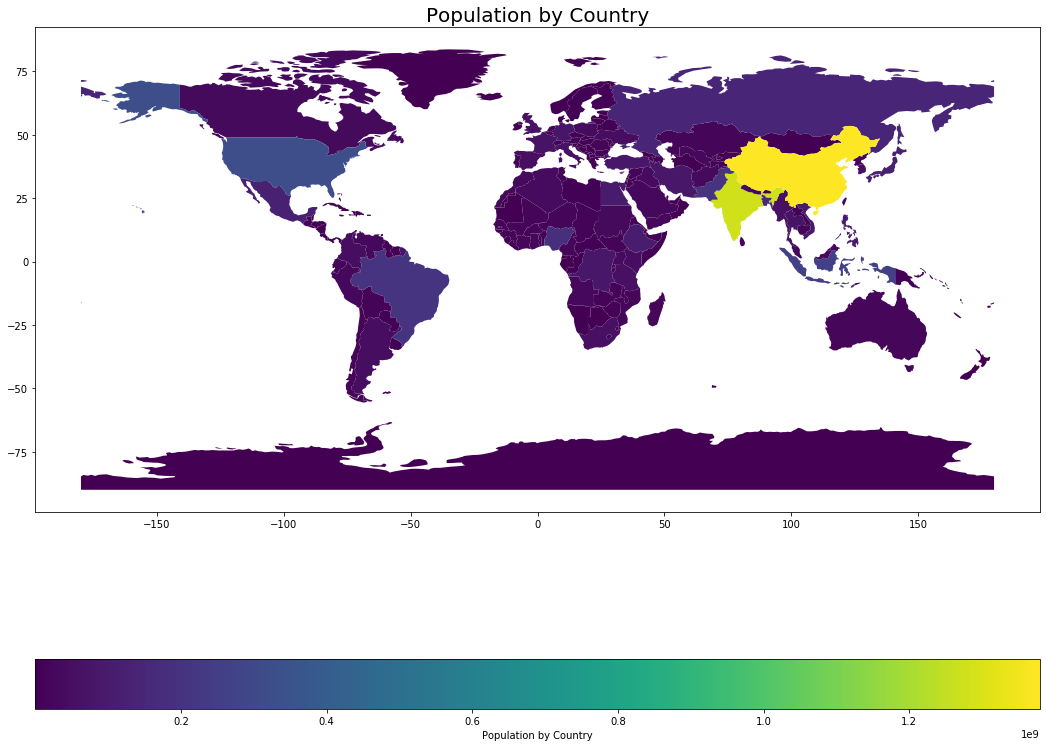

In [163]:
# Draw population of each countries
%matplotlib inline
pylab.rcParams['figure.figsize'] = 18, 18
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1)
ax.set_title("Population by Country", fontsize=20)
world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",'orientation': "horizontal"})
#            cmap='OrRd',
#            scheme='quantiles')

In [164]:
# Read the panda dataframe world of the library Geopandas
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### 3.1.2 Visualization of Alcohol consumption

In [165]:
# Merging world shape data with our alchohol consumption data
finaldf = finaldf.rename(columns={'iso3':'iso_a3'})
world = world.merge(finaldf, on='iso_a3')
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Number,Country,iso2,latitude,longitude,Region,Religion,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI,Alcohol_per_capita_2009-2011,Alcohol_per_capita_2009-2011_95%CI
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",55,Fiji,FJ,-16.578193,179.414413,Asia-Pacific Group,Christian,2.2,2.2-2.3,2.2,2.2-2.3
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",153,Canada,CA,56.130366,-106.346771,Western European and Others Group,Roman Catholic,8.1,8-8.3,8.3,8.2-8.5
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",62,Kazakhstan,KZ,48.019573,66.923684,Asia-Pacific Group,Islam,5.8,5.7-5.9,6.5,6.3-6.6
3,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",96,Uzbekistan,UZ,41.377491,64.585262,Asia-Pacific Group,Islam,1.6,1.6-1.6,1.8,1.8-1.8
4,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",79,Papuanewguinea,PG,-6.314993,143.95555,Asia-Pacific Group,Roman Catholic,0.7,0.7-0.7,0.8,0.8-0.8


In [166]:
# rename the columns of the dataframe world and sort them
world = world.rename(columns={'Alcohol_per_capita_2015-2017':'Alcohol_com1'})
world = world.rename(columns={'Alcohol_per_capita_2009-2011':'Alcohol_com2'})
world['Alcohol_com1'] = world.Alcohol_com1
world['Alcohol_com2'] = world.Alcohol_com2
world['iso_a3'] = world.iso_a3
world['Region'] = world.Region
world['Religion'] = world.Religion
world.columns.values.tolist()

['pop_est',
 'continent',
 'name',
 'iso_a3',
 'gdp_md_est',
 'geometry',
 'Number',
 'Country',
 'iso2',
 'latitude',
 'longitude',
 'Region',
 'Religion',
 'Alcohol_com1',
 'Alcohol_per_capita_2015-2017_95%CI',
 'Alcohol_com2',
 'Alcohol_per_capita_2009-2011_95%CI']

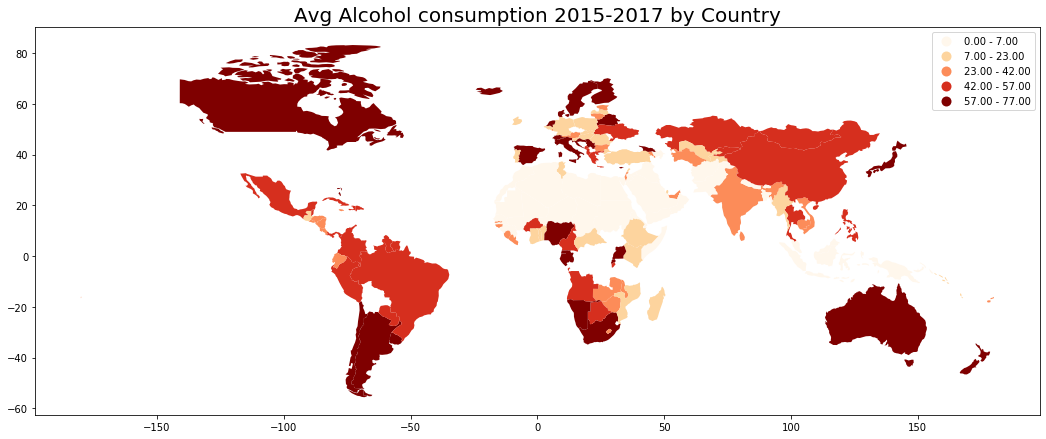

In [167]:
# Draw Alcohol consumptions by each country for the first time period 2015-2017
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 18, 18
fig, ax = plt.subplots(1, 1)
ax.set_title("Avg Alcohol consumption 2015-2017 by Country", fontsize=20)
world.plot(column='Alcohol_com1',
           ax=ax,
           legend=True,
#            legend_kwds={'labels': "Avg Alcohol_2015-2017 by Country",'legend': "horizontal"})
           cmap='OrRd',
           scheme='quantiles')

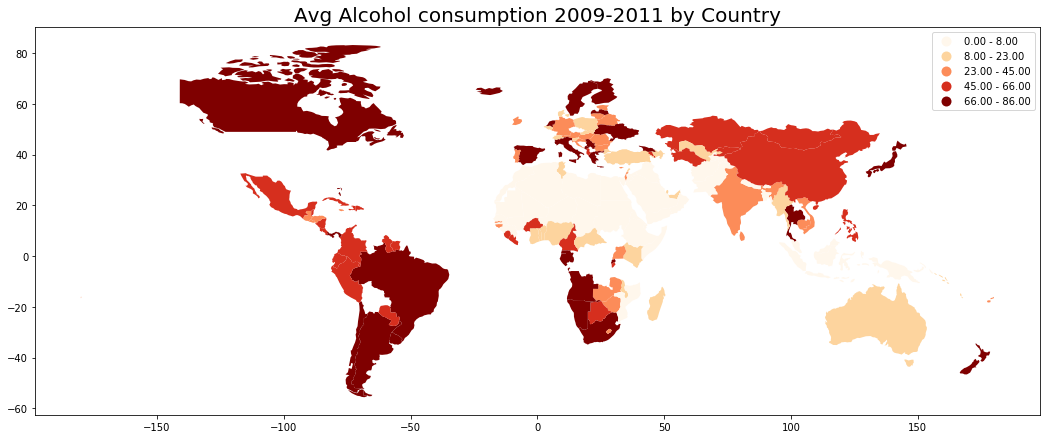

In [168]:
# Draw Alcohol consumptions by each country for the second time period 2009-2011
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 18, 18
fig, ax = plt.subplots(1, 1)
ax.set_title("Avg Alcohol consumption 2009-2011 by Country", fontsize=20)
world.plot(column='Alcohol_com2',
           ax=ax,
           legend=True,
#            legend_kwds={'labels': "Avg Alcohol_2015-2017 by Country",'legend': "horizontal"})
           cmap='OrRd',
           scheme='quantiles')

### 3.1.3 Identification and visualization of countries that experienced dramatically Alcohol consumption changes between two time periods

This step will be used to later examine this countries qualitatively (see datastory)

In [171]:
# Add a column name change by computing Alcohol_com1 minus Alcohol com2
world['change'] = world.apply(lambda x: float(x.Alcohol_com1) - float(x.Alcohol_com2), axis=1)
world.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Number,Country,iso2,latitude,longitude,Region,Religion,Alcohol_com1,Alcohol_per_capita_2015-2017_95%CI,Alcohol_com2,Alcohol_per_capita_2009-2011_95%CI,change
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",55,Fiji,FJ,-16.578193,179.414413,Asia-Pacific Group,Christian,2.2,2.2-2.3,2.2,2.2-2.3,0.0
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",153,Canada,CA,56.130366,-106.346771,Western European and Others Group,Roman Catholic,8.1,8-8.3,8.3,8.2-8.5,-0.2
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",62,Kazakhstan,KZ,48.019573,66.923684,Asia-Pacific Group,Islam,5.8,5.7-5.9,6.5,6.3-6.6,-0.7
3,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",96,Uzbekistan,UZ,41.377491,64.585262,Asia-Pacific Group,Islam,1.6,1.6-1.6,1.8,1.8-1.8,-0.2
4,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",79,Papuanewguinea,PG,-6.314993,143.95555,Asia-Pacific Group,Roman Catholic,0.7,0.7-0.7,0.8,0.8-0.8,-0.1
5,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",57,Indonesia,ID,-0.789275,113.921327,Asia-Pacific Group,Islam,0.3,0.3-0.3,0.1,0.1-0.1,0.2
6,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",120,Argentina,AR,-38.416097,-63.616672,Latin American and Caribbean Group,Roman Catholic,8.4,8.3-8.6,8.2,8-8.4,0.2
7,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",126,Chile,CL,-35.675147,-71.542969,Latin American and Caribbean Group,Roman Catholic,7.9,7.7-8,7.4,7.3-7.6,0.5
8,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",38,Somalia,SO,5.152149,46.199616,African Group,Islam,0,0-0,0,0-0,0.0
9,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",20,Kenya,KE,-0.023559,37.906193,African Group,Protestant,1.9,1.8-1.9,1.9,1.9-2,0.0


In [177]:
# Get those colums experienced drop larger than 0.5 liter per capita 
# and increase larger than 0.5 liter per capita
world_loc = world.loc[(world['change']>0.5)|(world['change']<-0.5)]
world_loc.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Number,Country,iso2,latitude,longitude,Region,Religion,Alcohol_com1,Alcohol_per_capita_2015-2017_95%CI,Alcohol_com2,Alcohol_per_capita_2009-2011_95%CI,change,change_label
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",62,Kazakhstan,KZ,48.019573,66.923684,Asia-Pacific Group,Islam,5.8,5.7-5.9,6.5,6.3-6.6,-0.7,0
18,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",147,Uruguay,UY,-32.522779,-55.765835,Latin American and Caribbean Group,Roman Catholic,9,8.9-9.2,8,7.8-8.1,1.0,1
19,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",125,Brazil,BR,-14.235004,-51.92528,Latin American and Caribbean Group,Roman Catholic,6.5,6.4-6.7,7.3,7.2-7.5,-0.8,0
30,591919,South America,Suriname,SUR,8547.0,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375...",146,Suriname,SR,3.919305,-56.027783,Latin American and Caribbean Group,Hindu .,4.3,4.2-4.4,5.4,5.3-5.5,-1.1,0
31,16290913,South America,Ecuador,ECU,182400.0,"POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...",132,Ecuador,EC,-1.831239,-78.183406,Latin American and Caribbean Group,Roman Catholic,3.3,3.3-3.4,3.9,3.9-4,-0.6,0
33,11147407,North America,Cuba,CUB,132900.0,"POLYGON ((-82.26815 23.18861, -81.40446 23.117...",129,Cuba,CU,21.521757,-77.781167,Latin American and Caribbean Group,Roman Catholic,4.7,4.6-4.8,4.1,4-4.2,0.6,1
34,13805084,Africa,Zimbabwe,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",46,Zimbabwe,ZW,-19.015438,29.154857,African Group,Christian,3.6,3.5-3.6,2.9,2.9-3,0.7,1
35,2214858,Africa,Botswana,BWA,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827...",3,Botswana,BW,-22.328474,24.684866,African Group,Christian,6.2,6.1-6.3,5.6,5.5-5.8,0.6,1
42,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....",33,Nigeria,NG,9.081999,8.675277,African Group,Islam,9.6,9.4-9.8,10.3,10.1-10.5,-0.7,0
52,1772255,Africa,Gabon,GAB,35980.0,"POLYGON ((11.27645 2.26105, 11.75167 2.32676, ...",15,Gabon,GA,-0.803689,11.609444,African Group,Christian,9.5,9.4-9.7,8.7,8.5-8.9,0.8,1


In [180]:
# Add change_label to identify those countries with significant change
world['change_label'] = world.apply(lambda x: 1 if (float(x.change)>0.5)|(float(x.change)<-0.5) else 0, axis=1)
world.describe()

,pop_est,gdp_md_est,change,change_label
count,1.410000e+02,1.410000e+02,141.000000,141.000000
mean,4.531808e+07,6.047490e+05,-0.192199,0.276596
std,1.607229e+08,2.019953e+06,0.835641,0.448910
min,2.828140e+05,7.230000e+02,-4.700000,0.000000
25%,4.510327e+06,2.926000e+04,-0.300000,0.000000
50%,1.073425e+07,9.424000e+04,0.000000,0.000000
75%,2.974886e+07,4.361000e+05,0.200000,1.000000
max,1.379303e+09,2.114000e+07,1.500000,1.000000


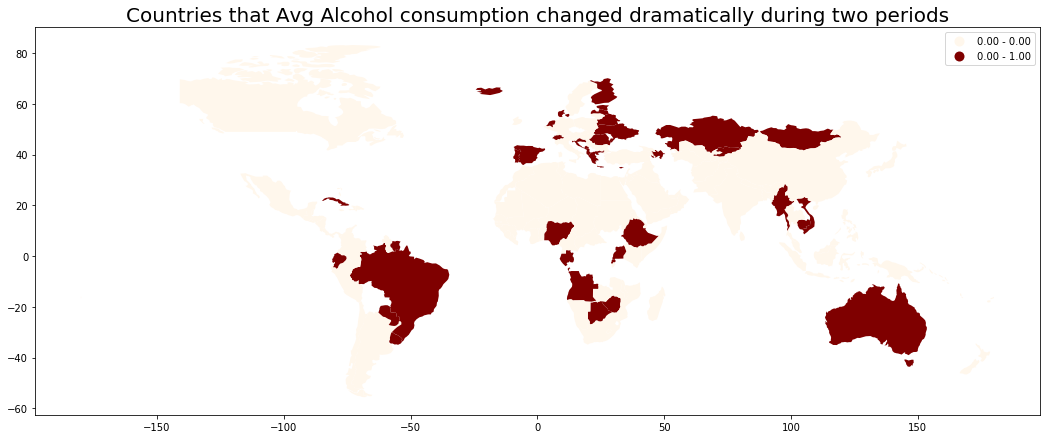

In [181]:
# Plot those countries with significant change on map
pylab.rcParams['figure.figsize'] = 18, 18
fig, ax = plt.subplots(1, 1)
ax.set_title("Countries that Avg Alcohol consumption changed dramatically during two periods", fontsize=20)
world.plot(column='change_label',
           ax=ax,
           legend=True,
#            legend_kwds={'labels': "Avg Alcohol_2015-2017 by Country",'legend': "horizontal"})
           cmap='OrRd',
           scheme='quantiles')

### 3.1.3 Visualization Religions by country

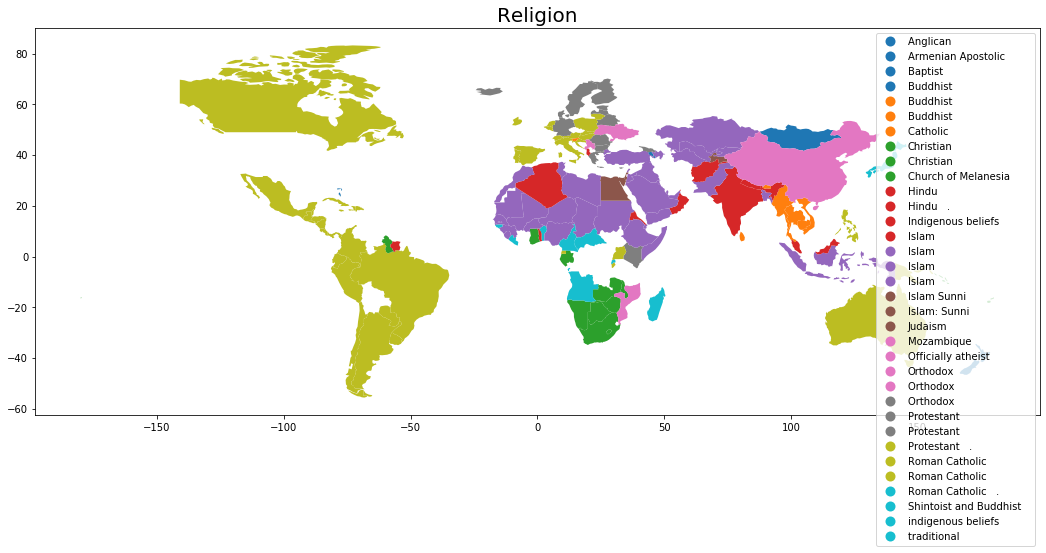

In [182]:
# Plot Religions division for countries
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 18, 18
fig, ax = plt.subplots(1, 1)
ax.set_title("Religion", fontsize=20)
world.plot(column='Religion',
           ax=ax,
           legend=True)

In [183]:
# transform the Alcohol consumption data from object into float for calculating mean
world['Alcohol_com1'] = world['Alcohol_com1'].astype(float)
world['Alcohol_com2'] = world['Alcohol_com2'].astype(float)
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 19 columns):
pop_est                               141 non-null int64
continent                             141 non-null object
name                                  141 non-null object
iso_a3                                141 non-null object
gdp_md_est                            141 non-null float64
geometry                              141 non-null geometry
Number                                141 non-null object
Country                               141 non-null object
iso2                                  140 non-null object
latitude                              141 non-null object
longitude                             141 non-null object
Region                                141 non-null object
Religion                              141 non-null object
Alcohol_com1                          141 non-null float64
Alcohol_per_capita_2015-2017_95%CI    141 non-null object
Alcohol_com2  

In [184]:
# calculate the mean of alcohol consumptions for each Region
df_region = world.groupby('Region').mean()
df_region = pd.DataFrame(df_region)
df_region.reset_index(inplace=True)
df_region.head()

,Region,pop_est,gdp_md_est,Alcohol_com1,Alcohol_com2,change,change_label
0,African Group,2.405089e+07,1.313070e+05,2.955814,3.030233,-0.074419,0.186047
1,Asia-Pacific Group,1.123788e+08,1.357694e+06,2.218919,2.213514,0.005405,0.189189
2,Eastern European Group,9.833712e+06,1.836578e+05,9.022222,9.688889,-0.666667,0.500000
3,Latin American and Caribbean Group,2.531567e+07,3.880110e+05,5.278261,5.317391,-0.039130,0.260870
4,Western European and Others Group,2.191894e+07,8.579313e+05,8.455000,9.015000,-0.560000,0.450000


In [185]:
# calculate the mean of alcohol consumptions for each Region
df_religion = world.groupby('Religion').mean()
df_religion = pd.DataFrame(df_religion)
df_religion.reset_index(inplace=True)
df_religion.head()

,Religion,pop_est,gdp_md_est,Alcohol_com1,Alcohol_com2,change,change_label
0,Anglican,4510327.0,174800.0,9.1,9.5,-0.4,0.0
1,Armenian Apostolic,3045191.0,26300.0,3.8,4.1,-0.3,0.0
2,Baptist,329988.0,9066.0,8.7,8.8,-0.1,0.0
3,Buddhist,3068243.0,37000.0,5.7,5.0,0.7,1.0
4,Buddhist,96160163.0,594900.0,3.1,2.2,0.9,1.0


In [95]:
# functions to add Alcohol consumption means of different regions and religions to each countries
def add_mean1_region(inputregion, df):
    mean = df.loc[df['Region'] == inputregion]['Alcohol_com1']
#     print("len_region", len(mean))
#     print(mean, type(mean), mean.index)
    return float(mean)
def add_mean1_religion(inputreligion, df):
    mean = df.loc[df['Religion'] == inputreligion]['Alcohol_com1']
#     print(inputreligion)
#     print("len_religion", len(mean))
#     print(mean, type(mean), mean.index)
    return float(mean)
def add_mean2_region(inputregion, df):
    mean = df.loc[df['Region'] == inputregion]['Alcohol_com2']
    return float(mean)
def add_mean2_religion(inputreligion, df):
    mean = df.loc[df['Religion'] == inputreligion]['Alcohol_com2']
    return float(mean)

In [96]:
# apply functions to each columns(countries) to get the mean of region or religion they belong to
world['Mean_Alcom1_region'] = world.Region.apply(add_mean1_region, args = (df_region,))
world['Mean_Alcom1_religion'] = world.Religion.apply(add_mean1_religion, args = (df_religion,))
world['Mean_Alcom2_region'] = world.Region.apply(add_mean2_region, args = (df_region,))
world['Mean_Alcom2_religion'] = world.Religion.apply(add_mean2_religion, args = (df_religion,))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Number,Country,iso2,latitude,...,Alcohol_com1,Alcohol_per_capita_2015-2017_95%CI,Alcohol_com2,Alcohol_per_capita_2009-2011_95%CI,change,change_label,Mean_Alcom1_region,Mean_Alcom1_religion,Mean_Alcom2_region,Mean_Alcom2_religion
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",55,Fiji,FJ,-16.578193,...,2.2,2.2-2.3,2.2,2.2-2.3,0.0,0,2.218919,4.636364,2.213514,4.454545
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",153,Canada,CA,56.130366,...,8.1,8-8.3,8.3,8.2-8.5,-0.2,0,8.455000,7.195000,9.015000,7.512500
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",62,Kazakhstan,KZ,48.019573,...,5.8,5.7-5.9,6.5,6.3-6.6,-0.7,0,2.218919,1.400000,2.213514,1.517073
3,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",96,Uzbekistan,UZ,41.377491,...,1.6,1.6-1.6,1.8,1.8-1.8,-0.2,0,2.218919,1.400000,2.213514,1.517073
4,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",79,Papuanewguinea,PG,-6.314993,...,0.7,0.7-0.7,0.8,0.8-0.8,-0.1,0,2.218919,7.195000,2.213514,7.512500


In [97]:
# Generate csv files for Global Visualization in DataStory using melt
world_visual = world[['iso2','Alcohol_com1','Mean_Alcom1_region','Mean_Alcom1_religion', 'Alcohol_com2', 'Mean_Alcom2_region','Mean_Alcom2_religion']]
world_visual.head()

,iso2,Alcohol_com1,Mean_Alcom1_region,Mean_Alcom1_religion,Alcohol_com2,Mean_Alcom2_region,Mean_Alcom2_religion
0,FJ,2.2,2.218919,4.636364,2.2,2.213514,4.454545
1,CA,8.1,8.455000,7.195000,8.3,9.015000,7.512500
2,KZ,5.8,2.218919,1.400000,6.5,2.213514,1.517073
3,UZ,1.6,2.218919,1.400000,1.8,2.213514,1.517073
4,PG,0.7,2.218919,7.195000,0.8,2.213514,7.512500


In [98]:
world_visual_final = pd.melt(world_visual, id_vars=['iso2'], value_vars = list(world_visual.columns)[1:],
                      var_name = 'Alcohol Consompution Group', value_name = 'Value')
world_visual_final = world_visual_final.sort_values(by='iso2')
world_visual_final.head(10)

,iso2,Alcohol Consompution Group,Value
771,AE,Mean_Alcom2_religion,1.517073
66,AE,Alcohol_com1,2.100000
630,AE,Mean_Alcom2_region,2.213514
489,AE,Alcohol_com2,1.700000
207,AE,Mean_Alcom1_region,2.218919
348,AE,Mean_Alcom1_religion,1.400000
82,AF,Alcohol_com1,0.000000
646,AF,Mean_Alcom2_region,2.213514
223,AF,Mean_Alcom1_region,2.218919
787,AF,Mean_Alcom2_religion,1.517073


In [99]:
world_visual_final.to_csv('../data/projectdata/world_visual_consumption.csv')
world_visual.columns

Index(['iso2', 'Alcohol_com1', 'Mean_Alcom1_region', 'Mean_Alcom1_religion',
       'Alcohol_com2', 'Mean_Alcom2_region', 'Mean_Alcom2_religion'],
      dtype='object')

## 3.2  Visualize policies

We identify three different means used by states to reduce the alcohol consumption:
* charge money for alcohol production, retail and consumption
* make the population aware of the dangers of alcohol
* restrict access to alcohol

In [52]:
# Grouping policies
groups = ['Charges', 'Awareness','Restrictions', 'Code', 'Region', 'Religion']
hierarchy = pd.DataFrame(columns=groups)

In [54]:
#getting lists of columns
age_limits = list(df_all.columns[:6])
awareness = list(df_all.columns[7:14])
health = list(df_all.columns[14:15])
licence = list(df_all.columns[15:21])
charge = list(df_all.columns[21:24])
restriction = list(df_all.columns[24:33])

#grouping relevant columns together
restriction.extend(age_limits)
awareness.extend(health)
charge.extend(licence)

In [55]:
hierarchy.columns

Index(['Charges', 'Awareness', 'Restrictions', 'Code', 'Region', 'Religion'], dtype='object')

In [56]:
hierarchy['Charges'] = df_all[charge].mean(axis=1)
hierarchy['Awareness'] = df_all[awareness].mean(axis=1)
hierarchy['Restrictions'] = df_all[restriction].mean(axis=1)
hierarchy['Code'] = df_all['Code']
hierarchy['Region'] = df_all['Region']
hierarchy['Religion']= df_all['Religion']
hierarchy.head()

,Charges,Awareness,Restrictions,Code,Region,Religion
Afghanistan,0.815573,0.035823,1.000000,AFG,Asia-Pacific Group,Islam
Albania,1.000000,0.375000,0.550667,ALB,Eastern European Group,Islam
Algeria,0.666667,0.000000,0.744000,DZA,African Group,Islam
Andorra,1.000000,0.000000,0.277333,AND,Western European and Others Group,Roman Catholic
Angola,1.000000,0.375000,0.310667,AGO,African Group,indigenous beliefs


In [57]:
# what is the most common approach
hierarchy.mean(axis=0)

Charges         0.815434
Awareness       0.397946
Restrictions    0.494503
dtype: float64

We can observe that in the world the most common alcohol control policy is to charge the consumer an extra fee.
This makes sense as it is the easiest  to enforce also for lower-income countries, who do not have the budget to have government programmes to reduce alcohol consumption

We look a bit closer inside each category

In [58]:
df_policy_mean = df_policy.mean()

In [59]:
bar_restriction = df_policy_mean[restriction].append(df_policy_mean[age_limits])
bar_awareness = df_policy_mean[awareness].append(df_policy_mean[health])
bar_charge = df_policy_mean[charge].append(df_policy_mean[licence])

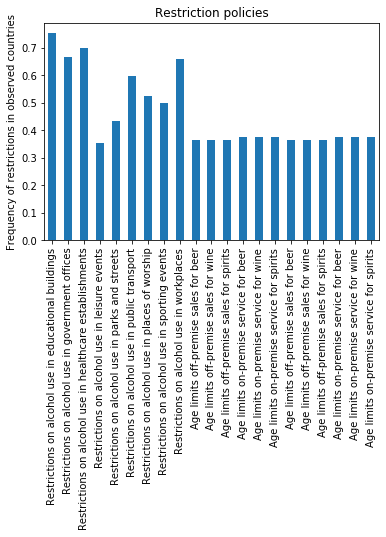

In [60]:
bar_restriction.plot(kind='bar', stacked=True)
plt.title('Restriction policies')
plt.ylabel('Frequency of restrictions in observed countries')
plt.show()

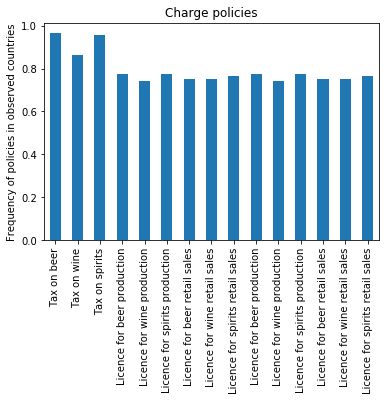

In [61]:
bar_charge.plot(kind='bar', stacked=True)
plt.title('Charge policies')
plt.ylabel('Frequency of policies in observed countries')
plt.show()

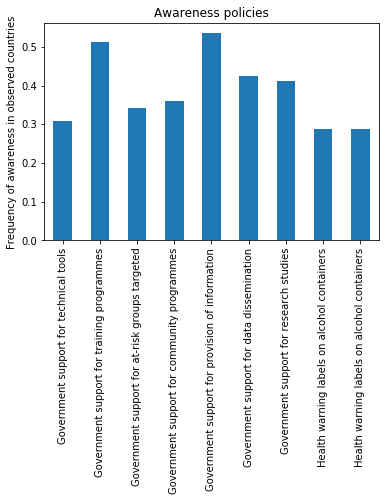

In [62]:
bar_awareness.plot(kind='bar', stacked=True)
# Add title and axis names
plt.title('Awareness policies')
plt.ylabel('Frequency of awareness in observed countries')
plt.show()

Being restriction policies a collection of many different policies there is a difference in the usage by countries of these policies. We can observe though that all these policies are not as popular as taxing alcoholic beverages

## 3.3 Policies by region and religion

we want to do the same analysis but by grouping the policies by country and religion

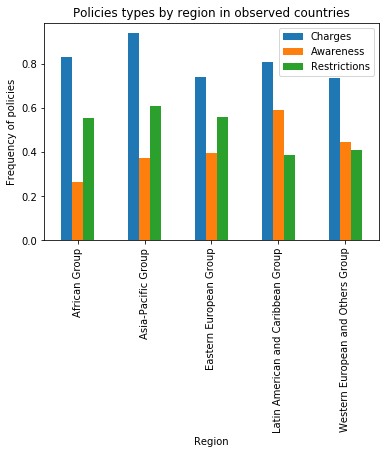

In [63]:
mean_by_region = hierarchy.groupby('Region').mean()
mean_by_region.plot(kind= 'bar')
plt.ylabel('Frequency of policies')
plt.title('Policies types by region in observed countries')
plt.show()

We can observe the popularity of different kind of policies is similar for different regions. The hypothesis made above about awareness being a policy put forward by developed countries does not stand as Western Europe has little difference with the other region in this category

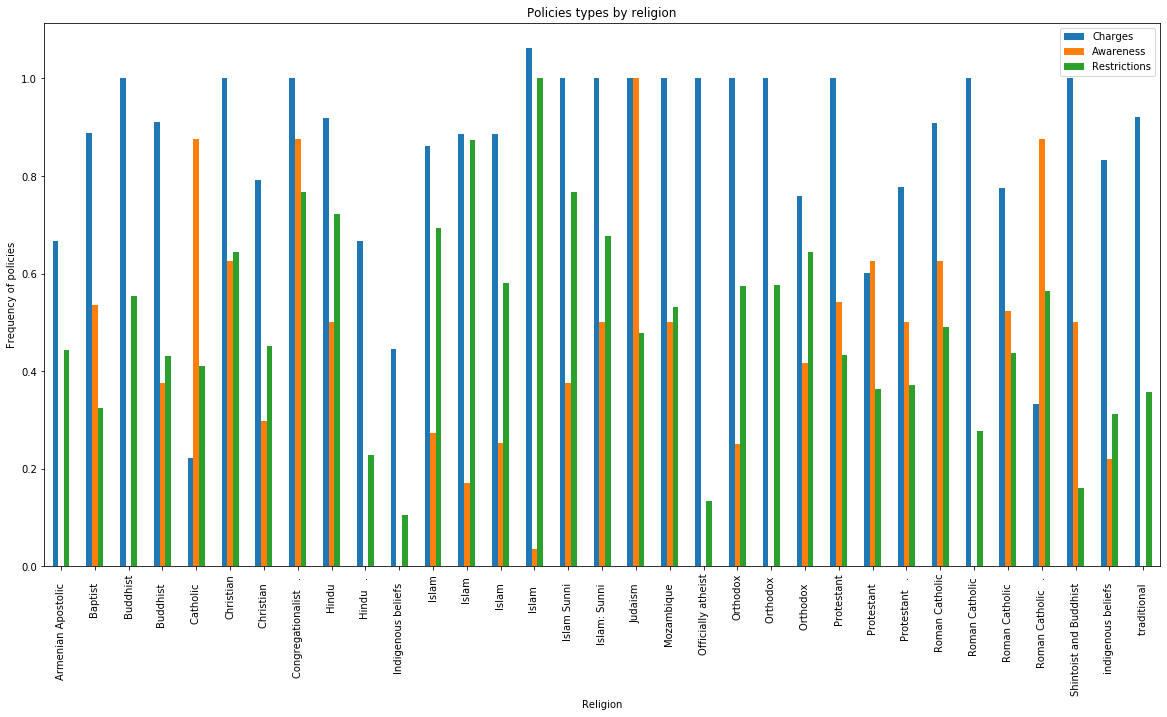

In [64]:
mean_by_religion = hierarchy.groupby('Religion').mean()
mean_by_religion.plot(kind= 'bar', figsize=(20,10))
plt.ylabel('Frequency of policies')
plt.title('Policies types by religion')
plt.show()

We can observe a few differences between countries with different religions
* Islamic and officially atheist (China) coutries have high number of regulations. The former due to the ban of alcohol imposed by the religion, the second due to the autocratic organization of the state
* Christian groups, except Roman Catholic and Orthodox, seem to have fewer restriction policies compared to other countries. 
* Orthodox and non-specified Christian countries have the lowest usage of taxes on alcoholic beverages. This can be due to the high cultural importance of alcohol in many post-soviet nations which are also orthodox

In [65]:
df_all.head()

,Age limits off-premise sales for beer,Age limits off-premise sales for wine,Age limits off-premise sales for spirits,Age limits on-premise service for beer,Age limits on-premise service for wine,Age limits on-premise service for spirits,Government support for earmarked funds,Government support for technical tools,Government support for training programmes,Government support for at-risk groups targeted,...,Restrictions on alcohol use in sporting events,Restrictions on alcohol use in workplaces,HDI_2016,"Unemployment, total (% of labour force)",Median age (years),Gross domestic product (GDP) per capita (2011 PPP $),Education Index,Code,Region,Religion
Afghanistan,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,...,1.0,1.0,0.494,8.8,17.3,1803,0.41,AFG,Asia-Pacific Group,Islam
Albania,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,1.0,0.782,15.2,36.2,11356,0.742,ALB,Eastern European Group,Islam
Algeria,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,1.0,0.753,10.2,27.5,13921,0.663,DZA,African Group,Islam
Andorra,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,0.0,0.5,0.856,..,..,..,0.714,AND,Western European and Others Group,Roman Catholic
Angola,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,1.0,0.0,...,0.0,0.5,0.577,7.7,16.4,5972,0.487,AGO,African Group,indigenous beliefs


## Clustering

In [100]:
#removing unnecessary columns
df_for_clustering = df_all.drop(columns=['Code', 'Region', 'Religion'])

In [101]:
#correcting the data type
for c in ("HDI_2016", "Unemployment, total (% of labour force)", "Median age (years)", "Gross domestic product (GDP) per capita (2011 PPP $)", "Education Index"):
    df_for_clustering[c] = pd.to_numeric(df_for_clustering[c], errors='coerce')

#fill nan with the mean values
df_for_clustering.fillna(df_for_clustering.mean(), inplace=True)

In [102]:
#normalizing the values
clustering_normalized_df = (df_for_clustering-df_for_clustering.min())/(df_for_clustering.max()-df_for_clustering.min())

In [103]:
#get the aclohol consumption values
alc_consumption = cdata[["Country", "Alcohol_per_capita_2015-2017"]]
alc_consumption = alc_consumption.rename({"Alcohol_per_capita_2015-2017": "Alcohol_per_capita"}, axis="columns")

In [104]:
#join dfs, remove countries with missing values for alcohol consumption 
clustering_normalized_df = clustering_normalized_df.join(alc_consumption.set_index(['Country']))
clustering_normalized_df = clustering_normalized_df.dropna()

In [105]:
#turn alcohol per capita to numeric type
clustering_normalized_df["Alcohol_per_capita"] = pd.to_numeric(clustering_normalized_df["Alcohol_per_capita"], errors='coerce')

In [106]:
clustering_normalized_df.head(10)

,Age limits off-premise sales for beer,Age limits off-premise sales for wine,Age limits off-premise sales for spirits,Age limits on-premise service for beer,Age limits on-premise service for wine,Age limits on-premise service for spirits,Government support for earmarked funds,Government support for technical tools,Government support for training programmes,Government support for at-risk groups targeted,...,Restrictions on alcohol use in public transport,Restrictions on alcohol use in places of worship,Restrictions on alcohol use in sporting events,Restrictions on alcohol use in workplaces,HDI_2016,"Unemployment, total (% of labour force)",Median age (years),Gross domestic product (GDP) per capita (2011 PPP $),Education Index,Alcohol_per_capita
Afghanistan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.238333,0.311594,0.076433,0.012304,0.271978,0.0
Albania,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,0.3,1.0,1.0,1.0,0.718333,0.543478,0.678344,0.113632,0.728022,5.0
Algeria,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.670000,0.362319,0.401274,0.140839,0.619505,0.6
Andorra,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.841667,0.285771,0.451871,0.180166,0.689560,10.1
Angola,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,1.0,0.0,...,0.0,0.5,0.0,0.5,0.376667,0.271739,0.047771,0.056524,0.377747,5.0
Argentina,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,1.0,0.0,1.0,1.0,...,0.3,0.3,0.3,0.3,0.785000,0.297101,0.506369,0.190310,0.826923,8.4
Armenia,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.663333,0.644928,0.605096,0.080050,0.737637,3.8
Australia,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,1.0,0.0,0.0,1.0,...,0.5,0.3,0.5,0.3,0.978333,0.199275,0.716561,0.465114,0.984890,9.7
Austria,0.363294,0.365647,0.365059,0.376235,0.376235,0.375647,0.0,0.0,0.0,0.0,...,0.5,0.3,0.5,0.3,0.925000,0.210145,0.901274,0.464806,0.879121,11.4
Azerbaijan,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.5,0.676667,0.173913,0.490446,0.162901,0.682692,0.5


In [107]:
clustering_normalized_np = clustering_normalized_df.to_numpy(copy=True)

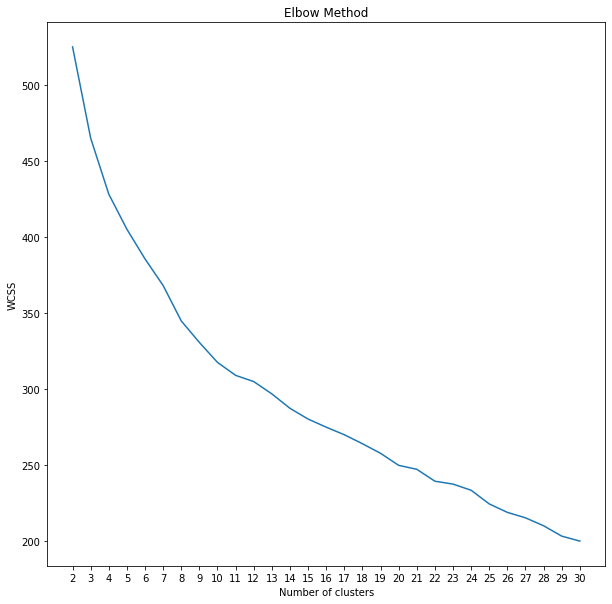

In [108]:
#trying to determine the optimal number of clusters with k-means for all the features with the elbow method
plt.rcParams['figure.figsize'] = [10, 10]
wcss = []
for i in range(2, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(clustering_normalized_np[:,:-1])
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 31), wcss)
plt.xticks(np.arange(2, 31, 1.0))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Due to "the curse of dimensionality", it is difficult to determine the optimal number of clusters for k-means with all the features

Therefore, we will try to find the features that are most indicative of the alcohol consumtion by using linear regression


In [110]:
#running linear regression on features, with the target being alcohol consumption
X = clustering_normalized_np[:,:-1]
y = clustering_normalized_np[:,-1:]

mse = np.zeros(100)
warnings.filterwarnings('ignore')
for a in range(100):
    mse[a] = -np.mean(cross_val_score(Ridge(alpha=a/10.0), X=X, y=y, cv=5, scoring='neg_mean_squared_error'));

In [111]:
#getting weights for the best performing alpha value
best_alpha = np.argmin(mse)
ridge = Ridge(best_alpha/10.0)
ridge.fit(X, y);

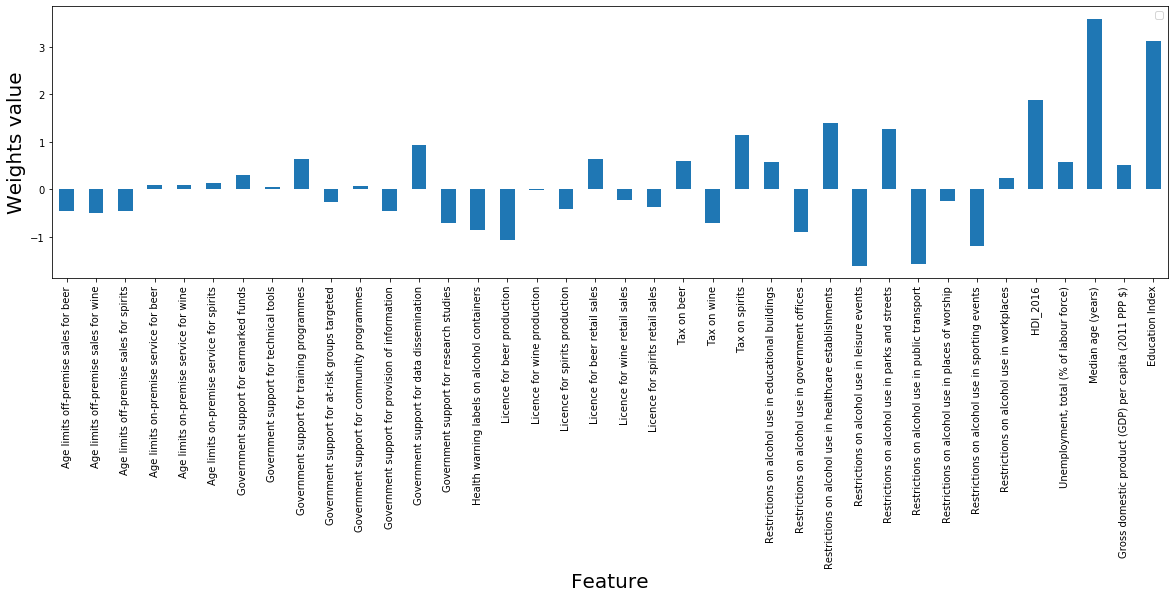

In [112]:
#plotting weights
plt.rcParams['figure.figsize'] = [20, 5]
df = pd.DataFrame({'_': ridge.coef_[0]}, index=clustering_normalized_df.columns.tolist()[:-1])
q = df.plot.bar()
q.set_xlabel('Feature', size=20)
q.set_ylabel('Weights value', size=20);

Alternatively, we can use correlations (as in hw2) to see which features are most indicative of the overall alcohol consumption

In [113]:
#calculating the correlations with alcohol consumption
correlations = clustering_normalized_df.corr().iloc[-1][:-1]
correlations = correlations.sort_values(ascending=False)
correlations = pd.DataFrame(correlations).T
correlations

,Median age (years),Education Index,HDI_2016,Gross domestic product (GDP) per capita (2011 PPP $),Government support for earmarked funds,Government support for data dissemination,Government support for technical tools,Government support for training programmes,Government support for provision of information,Government support for at-risk groups targeted,...,Licence for spirits retail sales,Restrictions on alcohol use in leisure events,Licence for wine retail sales,Restrictions on alcohol use in sporting events,Licence for beer production,Restrictions on alcohol use in public transport,Restrictions on alcohol use in workplaces,Tax on wine,Restrictions on alcohol use in places of worship,Restrictions on alcohol use in government offices
Alcohol_per_capita,0.701305,0.691535,0.64254,0.523073,0.317836,0.274159,0.25604,0.254684,0.20949,0.166033,...,-0.247843,-0.253395,-0.264114,-0.278671,-0.285118,-0.30669,-0.330588,-0.333024,-0.397269,-0.422421


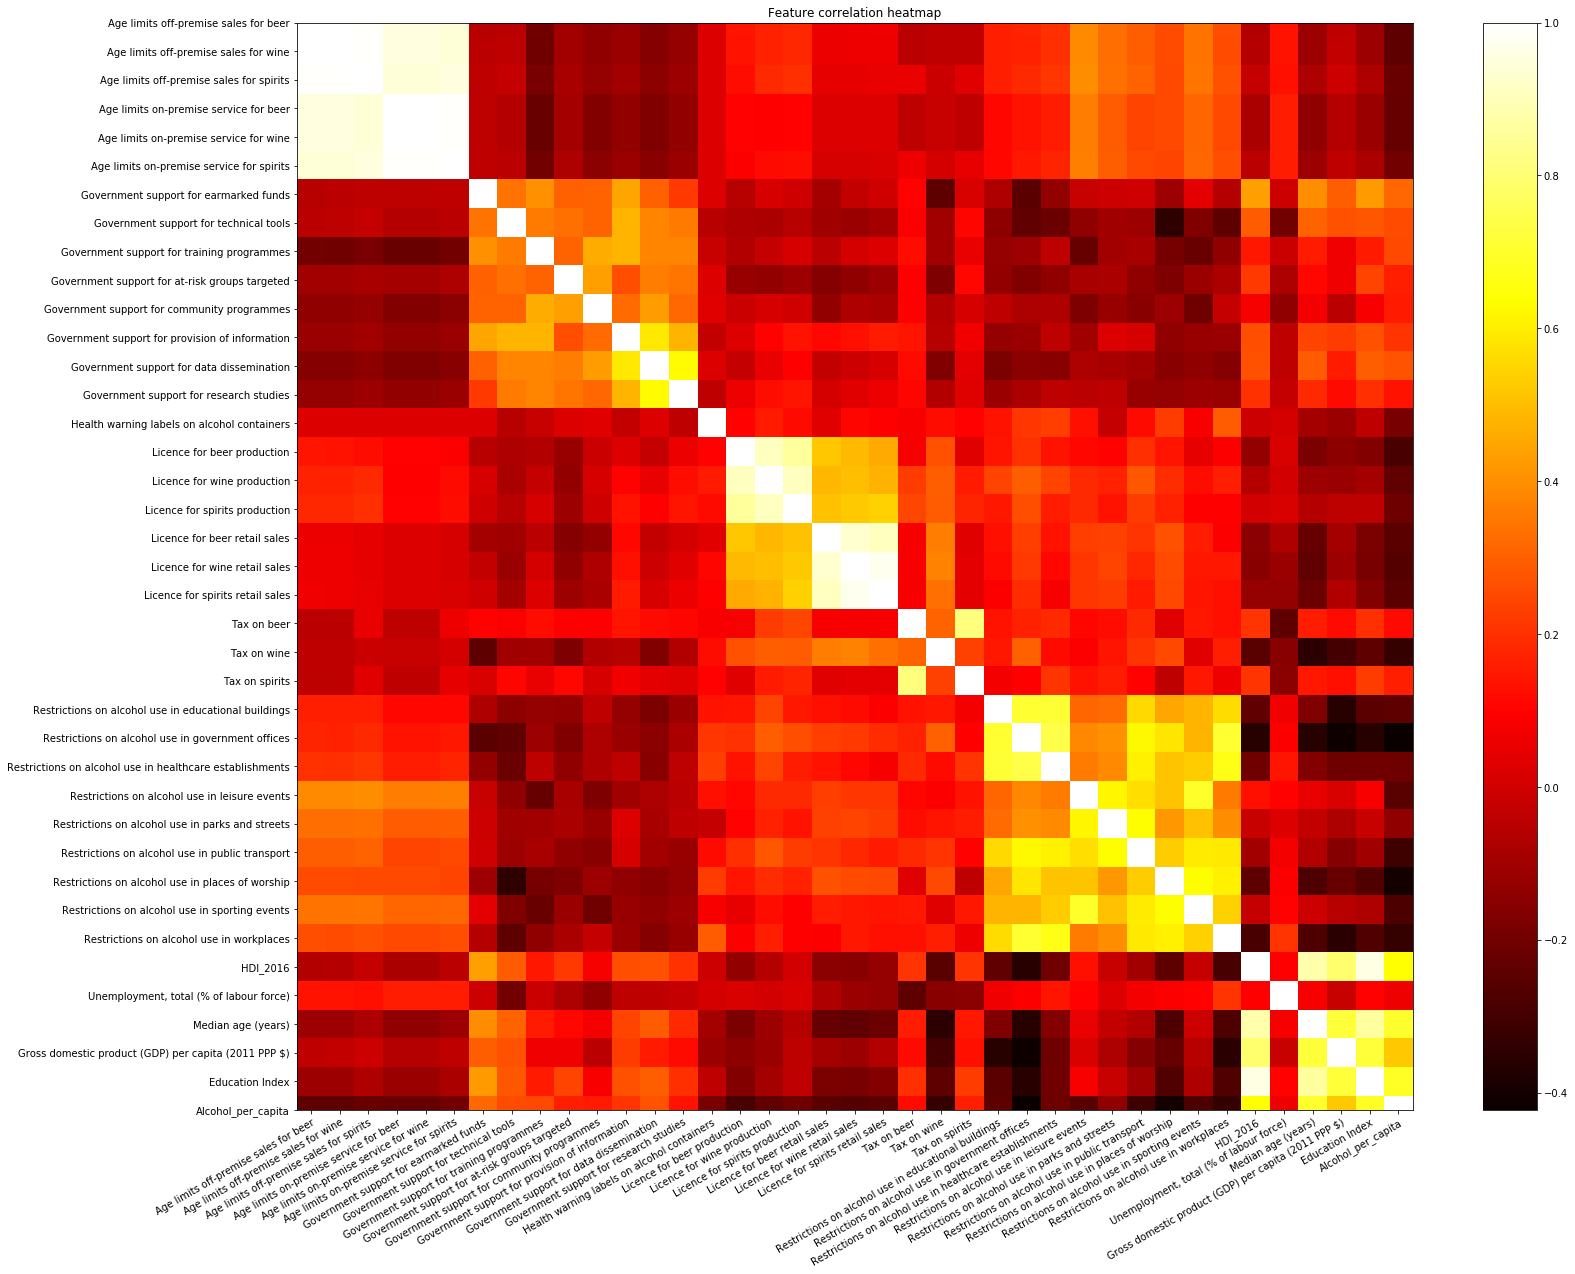

In [114]:
# Plotting the feature correlations heatmap for visualization
corr = clustering_normalized_df.corr()
plt.rcParams['figure.figsize'] = [25, 20]
h = plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar(h)
plt.title("Feature correlation heatmap")
plt.xticks(np.arange(39), corr.index, rotation=30, ha="right", rotation_mode="anchor")
plt.yticks(np.arange(39), corr.index)
plt.show()

The heatmap shows clear groups of policies and restrictions that have higher correlations within the group, indicating that they are not independent, which is to be expected. If there is a restriction on alcohol use in parks and streets in a certain country, it is more likely that it also has a restriction on alcohol use in public transport, while if a licence is necessary for beer production, almost certainly there is one for wine production as well.

The problem is that even if these features have fairly high correlation with alcohol consumption (eg. GDP, Education index and HDI), the strong correlation among themselves mean that there is some redundancy in the information they provide us with. Partially for this reason, the previously generated weights for GDP, for example, are quite low, despite it having one of the highest correlations with the alcohol consumption.

It is also important to note, that the correlation values get as low as -0.45, which represents negative correlation, meaning that the feature in question has an inversed effect on the other feature. For instance, presence of the restriction on alcohol use in government offices seems to indicate a relatively low alcohol consumption in the said country, but also fairly low GDP. We do not know wheather there is a causality between these features, but it is an interesting pattern nonetheless.

In [115]:
#taking features that have |correlation| > 0.3 with alcohol consumption
#in this case, top 5 positively correlating and top 6 negatively correlating features
correlating_features = correlations.columns.tolist()[:5] + correlations.columns.tolist()[-6:]
clustering_normalized_np = clustering_normalized_df[correlating_features].to_numpy(copy=True)

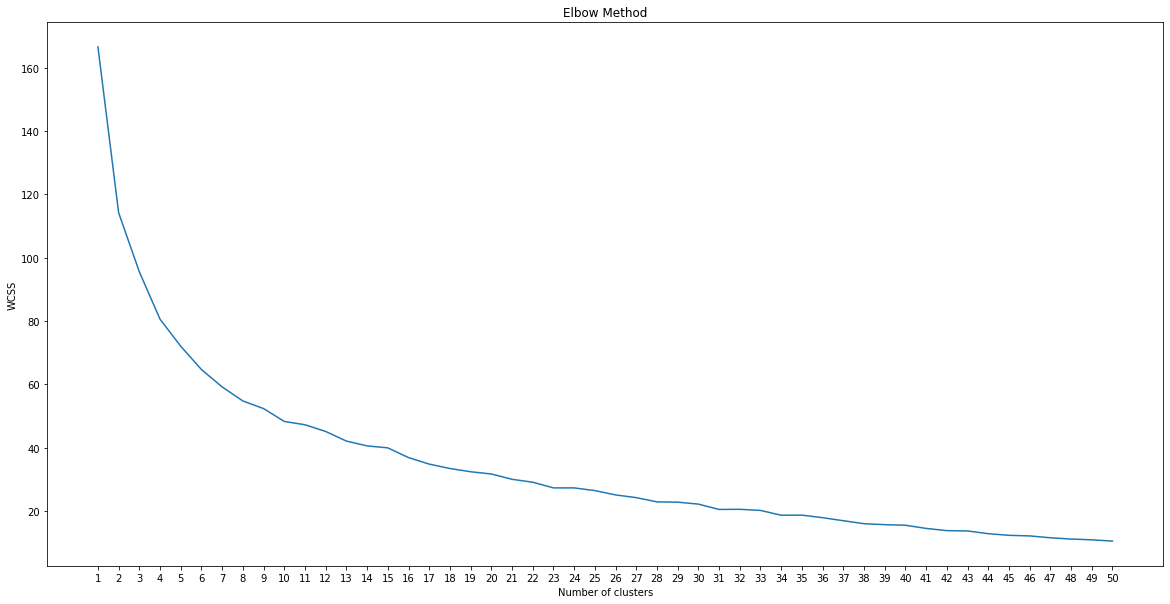

In [116]:
#trying to determine the optimal number of clusters with k-means for the correlating features
plt.rcParams['figure.figsize'] = [20, 10]
wcss = []
for i in range(1, 51):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=10000, n_init=10, random_state=0)
    kmeans.fit(clustering_normalized_np)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 51), wcss)
plt.xticks(np.arange(1, 51, 1.0))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

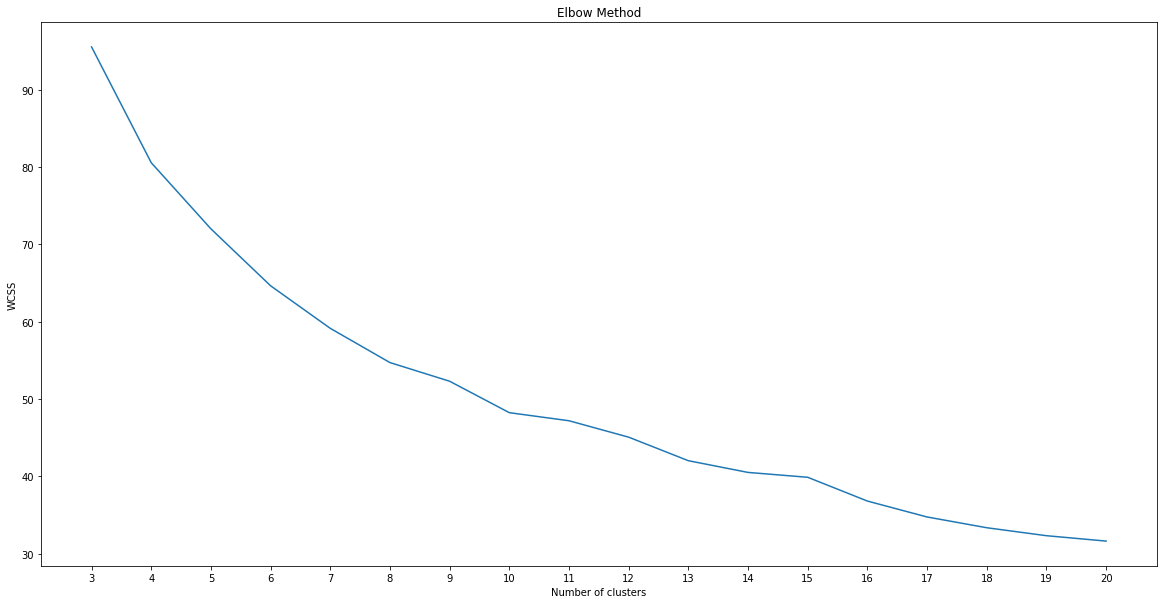

In [117]:
#trying to determine the optimal number of clusters with k-means for the correlating features (zoomed in)
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(range(3, 21), wcss[2:20])
plt.xticks(np.arange(3, 21, 1.0))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It appears that 9 clusters would be a reasonable choice

In [118]:
#clustering into 9 groups based on 11 selected features
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=10000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(clustering_normalized_np)

In [119]:
#order clusters by average alcohol consumption
clustering_normalized_df["cluster"] = pred_y
ordered_clusters = clustering_normalized_df.groupby(['cluster']).mean().sort_values(by=['Alcohol_per_capita']).index.tolist()
clustering_normalized_df["cluster"] = clustering_normalized_df["cluster"].apply(lambda x : ordered_clusters[x])

In [120]:
#preparing df for visualization
clustering_df = clustering_normalized_df[["Alcohol_per_capita", "cluster"]]
clustering_df = clustering_df.join(df_all['Code'])
clustering_df = clustering_df[~clustering_df.index.duplicated(keep='first')]
clustering_df = clustering_df.rename(columns={'Code':'iso_a3'})
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.merge(clustering_df, on='iso_a3')

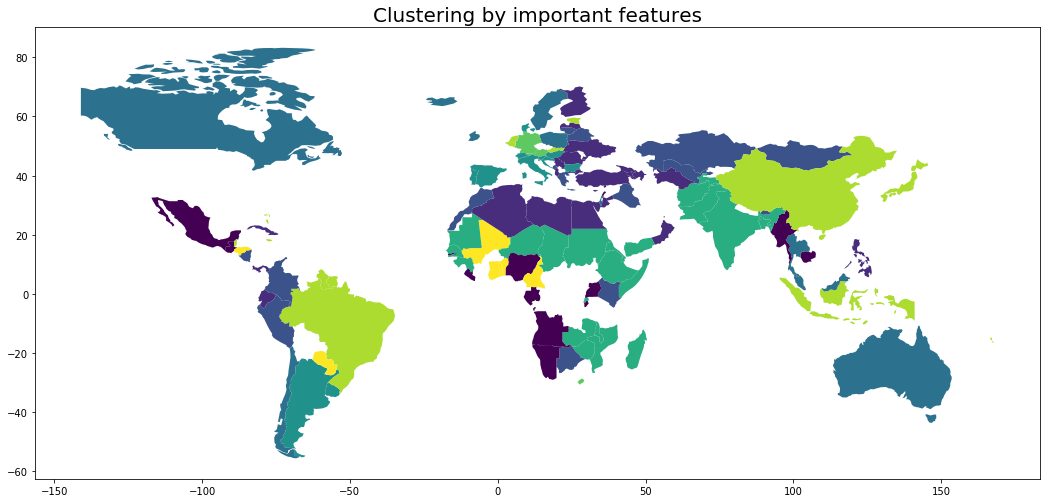

In [121]:
#visualizing clusters on the map
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 18, 18
fig, ax = plt.subplots(1, 1)
ax.set_title("Clustering by important features", fontsize=20)
world.plot(column='cluster', ax=ax);